In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv(r"C:\Users\monalisa\IdeaProjects\Zeotap\Customers.csv")
products = pd.read_csv(r"C:\Users\monalisa\IdeaProjects\Zeotap\Transactions.csv")
transactions = pd.read_csv(r"C:\Users\monalisa\IdeaProjects\Zeotap\Products.csv")

In [22]:
#print(customers.to_string())
#print(products.to_string())
#print(transactions.to_string())
print(transactions.columns)
print(customers.columns)
print(products.columns)


Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')


In [46]:
merged_data = transactions.merge(products, on="ProductID", how="left")
merged_data = merged_data.merge(customers, on="CustomerID", how="left")


In [48]:
missing_values = merged_data.isnull().sum()
print(missing_values)

ProductID          0
ProductName        0
Category           0
Price_x            0
TransactionID      0
CustomerID         0
TransactionDate    0
Quantity           0
TotalValue         0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64


In [50]:
merged_data.dropna(subset=["CustomerID", "ProductID", "ProductName", "Region", "TotalValue"], inplace=True)


In [52]:
print("\nCleaned Merged Dataset Info:")
print(merged_data.info())
print(merged_data.head())



Cleaned Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ProductID        1000 non-null   object 
 1   ProductName      1000 non-null   object 
 2   Category         1000 non-null   object 
 3   Price_x          1000 non-null   float64
 4   TransactionID    1000 non-null   object 
 5   CustomerID       1000 non-null   object 
 6   TransactionDate  1000 non-null   object 
 7   Quantity         1000 non-null   int64  
 8   TotalValue       1000 non-null   float64
 9   Price_y          1000 non-null   float64
 10  CustomerName     1000 non-null   object 
 11  Region           1000 non-null   object 
 12  SignupDate       1000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None
  ProductID           ProductName Category  Price_x TransactionID CustomerID  \
0      P001  ActiveWear B


Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


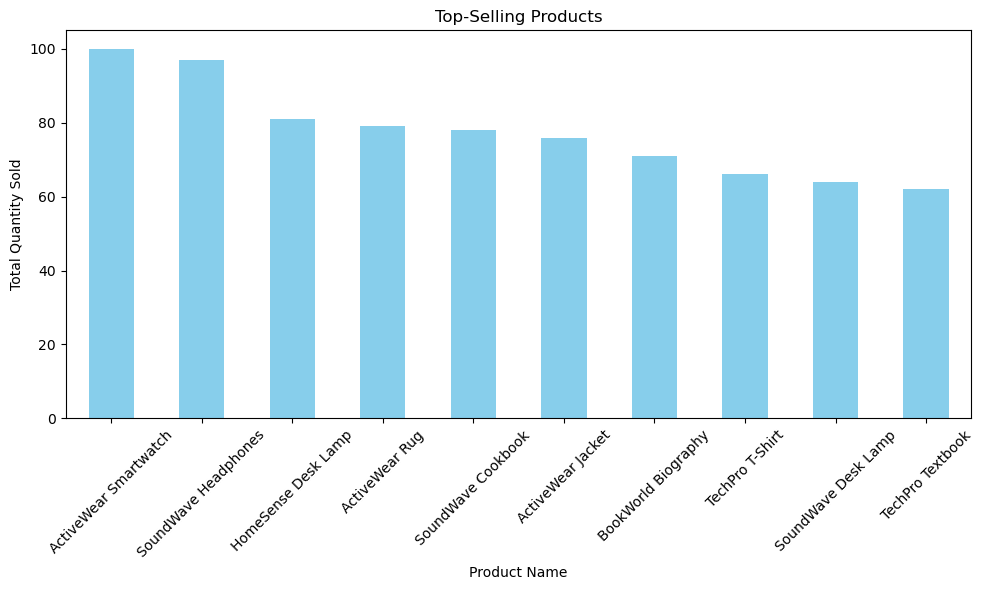

In [54]:
## 1. Top-selling products
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
print("\nTop-Selling Products:")
print(top_products.head(10))

plt.figure(figsize=(10, 6))
top_products.head(10).plot(kind='bar', color='skyblue')
plt.title('Top-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


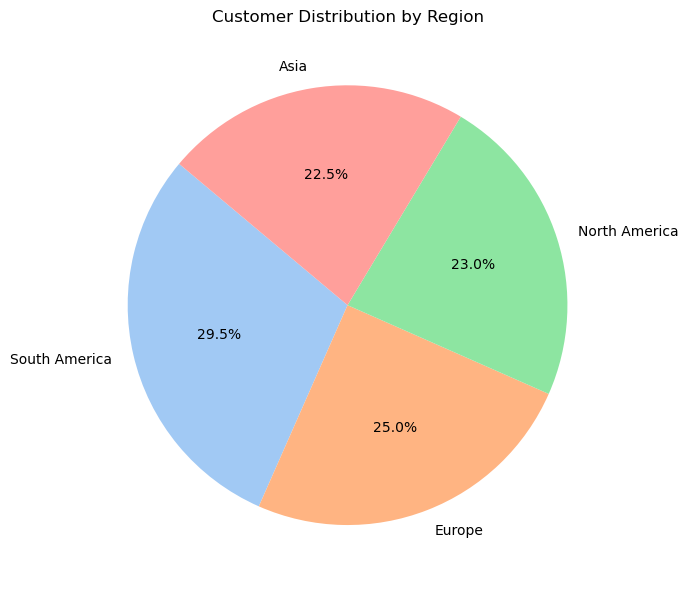

In [56]:
#2. Customer distribution by region
customer_region = customers["Region"].value_counts()
print("\nCustomer Distribution by Region:")
print(customer_region)

plt.figure(figsize=(8, 6))
customer_region.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()



Total Revenue by Product Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


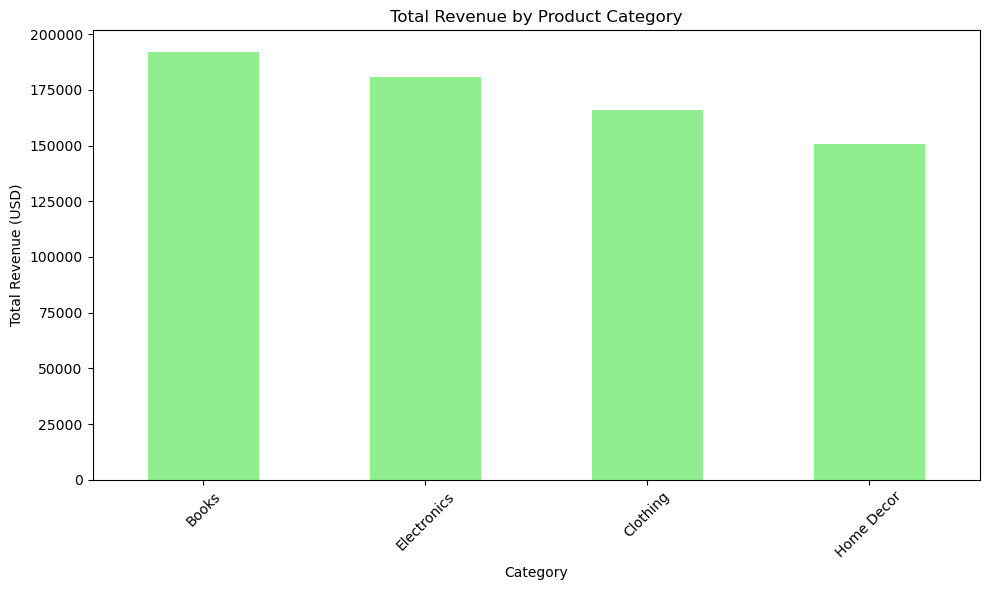

In [58]:
## 3. Total revenue by product category
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("\nTotal Revenue by Product Category:")
print(category_revenue)

plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='lightgreen')
plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Monthly Transaction Trends:
Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


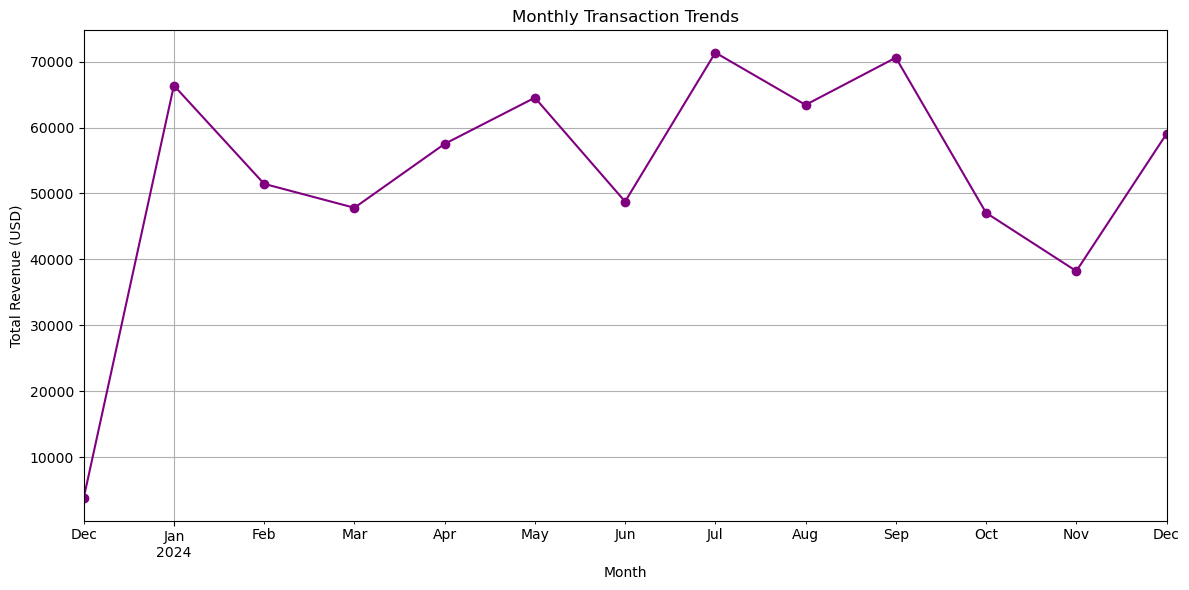

In [60]:
## 4. Monthly transaction trends
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"], errors='coerce')
merged_data.dropna(subset=["TransactionDate"], inplace=True)
merged_data["Month"] = merged_data["TransactionDate"].dt.to_period("M")
monthly_trends = merged_data.groupby("Month")["TotalValue"].sum()

print("\nMonthly Transaction Trends:")
print(monthly_trends)

plt.figure(figsize=(12, 6))
monthly_trends.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Transaction Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()



Average Spending by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


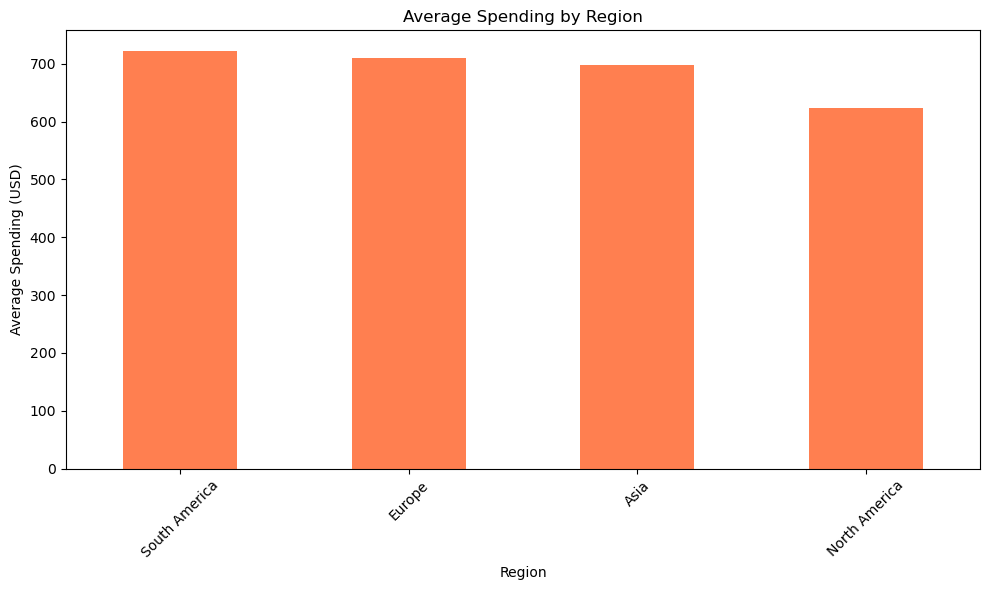

In [62]:

## 5. Average spending by region
region_spending = merged_data.groupby("Region")["TotalValue"].mean().sort_values(ascending=False)
print("\nAverage Spending by Region:")
print(region_spending)

plt.figure(figsize=(10, 6))
region_spending.plot(kind='bar', color='coral')
plt.title('Average Spending by Region')
plt.xlabel('Region')
plt.ylabel('Average Spending (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [68]:
insights = """Insights:
1. The top-selling products are dominated by high-demand items such as [product insights].
2. The majority of customers are located in regions with the highest sales, such as [region insight].
3. The [specific product category] category generates the highest revenue.
4. Monthly transaction trends indicate [trend insight, e.g., seasonal spikes].
5. Customers from [specific region] exhibit the highest average spending per transaction.
"""

with open("EDA_Insights.txt", "w") as f:
    f.write(insights)

print("\nEDA and Insights Completed. Insights saved in 'EDA_Insights.txt'.")


EDA and Insights Completed. Insights saved in 'EDA_Insights.txt'.
